<a href="https://colab.research.google.com/github/soyebganja/DL-Practice-Projects/blob/main/9%3AModel%20Optimization%3A%20Regularization%20Techniques/9_5_Early_Stopping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import accuracy_score

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [76]:
df = pd.read_csv('sonar.all-data', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [77]:
df.shape

(208, 61)

In [78]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [79]:
df[60].value_counts()

,count
60,
M,111
R,97


In [80]:
df[60] = df[60].map({'M': 0, 'R': 1})
df.sample(2)

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
101,0.0335,0.0134,0.0696,0.1180,0.0348,0.118,0.1948,0.1607,0.3036,0.4372,...,0.0244,0.0232,0.0093,0.0159,0.0193,0.0032,0.0377,0.0126,0.0156,0
78,0.0231,0.0351,0.0030,0.0304,0.0339,0.086,0.1738,0.1351,0.1063,0.0347,...,0.0106,0.0097,0.0022,0.0052,0.0072,0.0056,0.0038,0.0043,0.0030,1


In [81]:
X = df.drop(60, axis=1)
y = df[60]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [82]:
X_train.shape

(156, 60)

In [83]:
y_train.values

array([1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1])

In [84]:
# Convert the split array to PyTorch tensors
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

In [85]:
# Create Tensor Datasets
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

# Create DataLoader
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

### Train a Simple Neural Network

In [86]:
class SimpleNN(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            nn.Linear(60, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 2)
        )

    def forward(self, x):
        return self.network(x)

In [87]:
# Training Function
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=20):
    train_losses, val_losses, val_accuracies = [], [], []
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels.long())
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        train_losses.append(running_loss / len(train_loader))

        # validation phase
        model.eval()
        val_loss = 0.0
        all_preds, all_labels = [], []
        with torch.no_grad():
            for inputs, labels in val_loader:
                outputs = model(inputs)
                loss = criterion(outputs, labels.long())
                val_loss += loss.item()
                preds = torch.argmax(outputs, dim=1)
                all_preds.extend(preds.cpu().numpy())
                all_labels.extend(labels.cpu().numpy())
        val_losses.append(val_loss / len(val_loader))
        val_accuracy = accuracy_score(all_labels, all_preds)
        val_accuracies.append(val_accuracy)

        print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_losses[-1]:.4f}, Val Loss: {val_losses[-1]:.4f}, Val Accuracy: {val_accuracy:.4f}")

    return train_losses, val_losses, val_accuracies

Epoch 1/40, Train Loss: 0.6900, Val Loss: 0.6755, Val Accuracy: 0.5192
Epoch 2/40, Train Loss: 0.6800, Val Loss: 0.6576, Val Accuracy: 0.5192
Epoch 3/40, Train Loss: 0.6689, Val Loss: 0.6507, Val Accuracy: 0.5192
Epoch 4/40, Train Loss: 0.6540, Val Loss: 0.6349, Val Accuracy: 0.6538
Epoch 5/40, Train Loss: 0.6376, Val Loss: 0.6079, Val Accuracy: 0.7115
Epoch 6/40, Train Loss: 0.6032, Val Loss: 0.5960, Val Accuracy: 0.7692
Epoch 7/40, Train Loss: 0.5714, Val Loss: 0.5745, Val Accuracy: 0.8269
Epoch 8/40, Train Loss: 0.5272, Val Loss: 0.5427, Val Accuracy: 0.8077
Epoch 9/40, Train Loss: 0.4902, Val Loss: 0.5173, Val Accuracy: 0.7692
Epoch 10/40, Train Loss: 0.4558, Val Loss: 0.5022, Val Accuracy: 0.7500
Epoch 11/40, Train Loss: 0.4422, Val Loss: 0.5412, Val Accuracy: 0.7500
Epoch 12/40, Train Loss: 0.4330, Val Loss: 0.5082, Val Accuracy: 0.7500
Epoch 13/40, Train Loss: 0.4276, Val Loss: 0.4731, Val Accuracy: 0.7500
Epoch 14/40, Train Loss: 0.3837, Val Loss: 0.5232, Val Accuracy: 0.7500
E

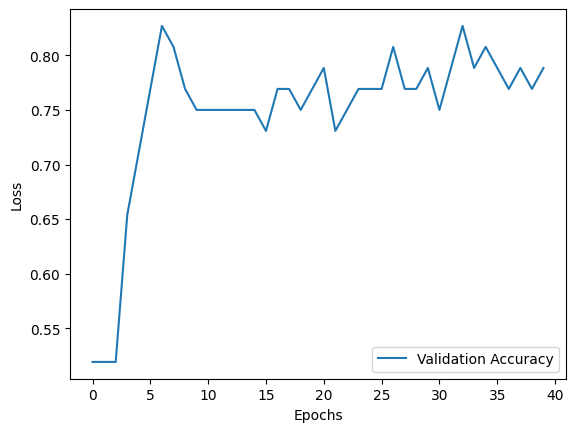

In [88]:
# initialize and train the model without dropout
model_without_dropout = SimpleNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_without_dropout.parameters(), lr=0.001)

train_losses_without_dropout, val_losses_without_dropout, val_accuracies_without_dropout = train_model(
  model_without_dropout, train_loader, test_loader, criterion, optimizer, num_epochs=40
)

# Plot training and validation Loss and accuracy (without dropout)
# plt.plot(train_losses_without_dropout, label='Training Loss')
# plt.plot(val_losses_without_dropout, label='Validation Loss')
plt.plot(val_accuracies_without_dropout, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Train a Neural Network with Early Stopping

In [89]:
# Training Function
def train_model_early_stop(model, train_loader, val_loader, criterion, optimizer, num_epochs=20):

    patience = 3
    best_accuracy = 0
    counter = 0
    train_losses, val_losses, val_accuracies = [], [], []
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels.long())
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        train_losses.append(running_loss / len(train_loader))

        # validation phase
        model.eval()
        val_loss = 0.0
        all_preds, all_labels = [], []
        with torch.no_grad():
            for inputs, labels in val_loader:
                outputs = model(inputs)
                loss = criterion(outputs, labels.long())
                val_loss += loss.item()
                preds = torch.argmax(outputs, dim=1)
                all_preds.extend(preds.cpu().numpy())
                all_labels.extend(labels.cpu().numpy())
        val_losses.append(val_loss / len(val_loader))
        val_accuracy = accuracy_score(all_labels, all_preds)
        val_accuracies.append(val_accuracy)

        print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_losses[-1]:.4f}, Val Loss: {val_losses[-1]:.4f}, Val Accuracy: {val_accuracy:.4f}")

        if val_accuracy > best_accuracy:
            best_accuracy = val_accuracy
            counter = 0
            torch.save(model.state_dict(), 'best_model.pth')
        else:
            counter += 1
            if counter >= patience:
                print(f"Early stopping triggered at epoch {epoch+1}")
                break

    return train_losses, val_losses, val_accuracies

Epoch 1/40, Train Loss: 0.6913, Val Loss: 0.6653, Val Accuracy: 0.5192
Epoch 2/40, Train Loss: 0.6801, Val Loss: 0.6560, Val Accuracy: 0.5192
Epoch 3/40, Train Loss: 0.6672, Val Loss: 0.6568, Val Accuracy: 0.6154
Epoch 4/40, Train Loss: 0.6557, Val Loss: 0.6266, Val Accuracy: 0.5192
Epoch 5/40, Train Loss: 0.6285, Val Loss: 0.6209, Val Accuracy: 0.7115
Epoch 6/40, Train Loss: 0.5998, Val Loss: 0.5800, Val Accuracy: 0.6731
Epoch 7/40, Train Loss: 0.5689, Val Loss: 0.5945, Val Accuracy: 0.7500
Epoch 8/40, Train Loss: 0.5203, Val Loss: 0.5260, Val Accuracy: 0.7115
Epoch 9/40, Train Loss: 0.5039, Val Loss: 0.6037, Val Accuracy: 0.7308
Epoch 10/40, Train Loss: 0.4686, Val Loss: 0.4963, Val Accuracy: 0.7115
Early stopping triggered at epoch 10


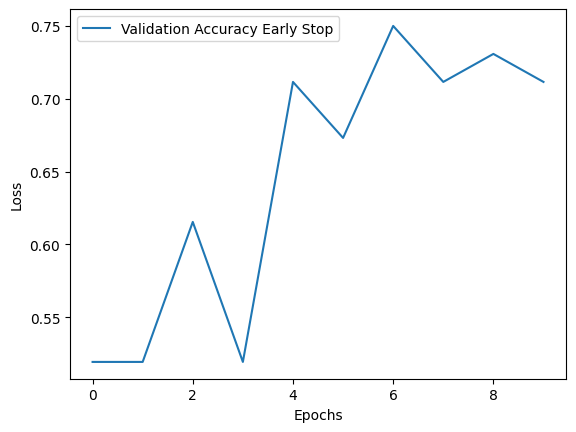

In [90]:
# initialize and train the model without dropout
model_without_dropout = SimpleNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_without_dropout.parameters(), lr=0.001)

train_losses_without_dropout, val_losses_without_dropout, val_accuracies_without_dropout = train_model_early_stop(
  model_without_dropout, train_loader, test_loader, criterion, optimizer, num_epochs=40
)

# Plot training and validation Loss and accuracy (without dropout)
# plt.plot(train_losses_without_dropout, label='Training Loss')
# plt.plot(val_losses_without_dropout, label='Validation Loss')
plt.plot(val_accuracies_without_dropout, label='Validation Accuracy Early Stop')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [91]:
model_without_dropout.load_state_dict(torch.load('best_model.pth'))

<All keys matched successfully>

In [92]:
# validation phase
model_without_dropout.eval()
y_pred, y_true = [], []
with torch.no_grad():
  for inputs, labels in test_loader:
    outputs = model_without_dropout(inputs)
    loss = criterion(outputs, labels.long())
    _, predicted = torch.max(outputs, dim=1)
    y_pred.extend(predicted.cpu().numpy())
    y_true.extend(labels.cpu().numpy())

val_accuracy = accuracy_score(y_true, y_pred)
val_accuracy

0.75